# Introducción

Los siguientes ejercicios propuestos ilustran conceptos clave de transformaciones geométricas en álgebra lineal, destacando la importancia del orden de las transformaciones, la invariancia del movimiento relativo y la conversión entre sistemas de coordenadas.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Problema 4.22

Muéstrese que el orden en que se efectúan las transformaciones es importante por la transformación del triángulo $ A(1,0), B(0,1), C(1,1) $, al a) girar 45°  con respecto al origen y trasladar depués en la dirección del vector $ I $, y b) trasladar y después girar.

Necesitamos primero la matriz de rotación y la matriz de traslación:

$$
R_0 = \begin{bmatrix} \cos(\theta) & -\sin(\theta) & 0 \\ \sin(\theta) & \cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix}
$$

$$
T_v = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1 \end{bmatrix}
$$

El vector de nuestro triángulo es:

$$
\begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}
$$

El vector $ I $ lo definiremos como: $ I = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $

### a) Girar 45° con respecto al origen y trasladar después en la dirección del vector $ I $ resulta en:

$$
V' = R_0 \cdot T_v \cdot V
$$

$$
V' = \begin{bmatrix} \cos(45) & -\sin(45) & 0 \\ \sin(45) & \cos(45) & 0 \\ 0 & 0 & 1 \end{bmatrix} \cdot \begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} \cdot \begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}
$$

### Realizando la multiplicación de matrices:

In [4]:
# Definir el ángulo en radianes
theta = np.radians(45)

# Primera matriz (rotación)
R = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

# Segunda matriz (traslación)
T = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [0, 0, 1]
])

# Tercera matriz (otra transformación)
V = np.array([
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1]
])

# Calcular la multiplicación de matrices
V_prime = np.dot(R, np.dot(T, V))

print(V_prime)

[[1.41421356 0.         0.70710678]
 [1.41421356 1.41421356 2.12132034]
 [1.         1.         1.        ]]


La matriz resultante es:

$$
V' = \begin{bmatrix} 1.41421356 & 0 & 0.707107 \\ 1.41421356 & 1.41421356 & 2.12132034 \\ 1 & 1 & 1 \end{bmatrix}
$$

Por lo que el nuevo triángulo es $ A'(1.41421356, 1.41421356), B'(0,1.41421356) $ y $ C'(0.707107, 2.12132034) $

### b) Trasladar y después girar resulta en:

$$
V' = T_v \cdot R_0 \cdot V
$$

$$
V' = \begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} \cdot \begin{bmatrix} \cos(45) & -\sin(45) & 0 \\ \sin(45) & \cos(45) & 0 \\ 0 & 0 & 1 \end{bmatrix} \cdot \begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}
$$

###  Los valores de las matrices se mantienen igual, pero el orden de la multiplicación cambia: 

In [5]:
V_prime = np.dot(T, np.dot(R, V))
print(V_prime)

[[1.70710678 0.29289322 1.        ]
 [0.70710678 0.70710678 1.41421356]
 [1.         1.         1.        ]]


La matriz resultante es:

$$
V' = \begin{bmatrix} 1.70710678 & 0.29289322 & 1 \\ 0.70710678 & 0.70710678 & 1.41421356 \\ 1 & 1 & 1 \end{bmatrix}
$$

Por lo que el nuevo triángulo es $ A'(1.70710678, 0.70710678), B'(0.29289322,0.70710678) $ y $ C'(1, 1.41421356) $

### Dibujemos los triángulos para ver la diferencia:


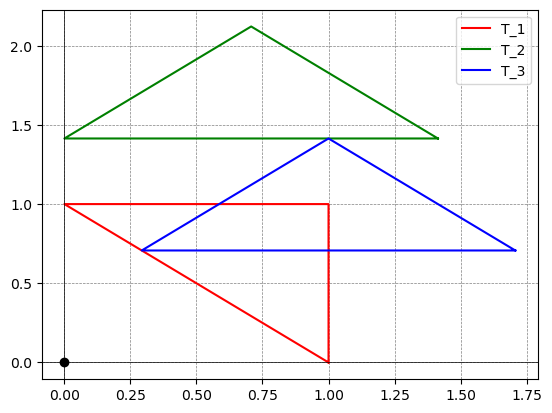

In [6]:
# Definir los triángulos
T_1 = np.array([[1,0], [0,1], [1,1]])
T_2 = np.array([[1.41421356, 1.41421356], [0,1.41421356], [0.707107, 2.12132034]])
T_3 = np.array([[1.70710678, 0.70710678], [0.29289322,0.70710678], [1, 1.41421356]])

# Añadir el primer punto al final para cerrar el triángulo
T_1 = np.vstack([T_1, T_1[0]])
T_2 = np.vstack([T_2, T_2[0]])
T_3 = np.vstack([T_3, T_3[0]])

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar los triángulos
ax.plot(T_1[:,0], T_1[:,1], 'r-', label='T_1') # rojo
ax.plot(T_2[:,0], T_2[:,1], 'g-', label='T_2') # verde
ax.plot(T_3[:,0], T_3[:,1], 'b-', label='T_3') # azul

# Mostrar el origen
ax.plot(0, 0, 'ko') # negro

# Mostrar los ejes
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Añadir una leyenda
ax.legend()

# Mostrar la gráfica
plt.show()



# Problema 4.23

Un punto objeto $P(x,y)$ se traslada en la dirección $ v = aI + bJ $, simultaneamente, un observador se mueve en la dirección $ v $. Muéstrese que no hay movimiento aparente (desde la perspectiva del observador) del punto objeto.

Supongamos que tenemos el punto en $ P(1,1) $ y al observador en $ O(0,0) $  su distancia es:

$$ d = \sqrt{(1-0)^2 + (1-0)^2} = \sqrt{2} $$

Ahora a ambos los trasladamos en el vector $ v = 2I + 3J $. El punto se traslada a $ P'(3,4) $  y el observador se traslada a $ O'(2,3) $ , por lo que al calcular la distancia entre el punto y el observador obtenemos:

$$ d' = \sqrt{(3-2)^2 + (4-3)^2} = \sqrt{2} $$


Por lo que la distancia entre el punto y el observador no cambia, por lo que no hay movimiento aparente.

podemos demostrarlo con el siguiente código:



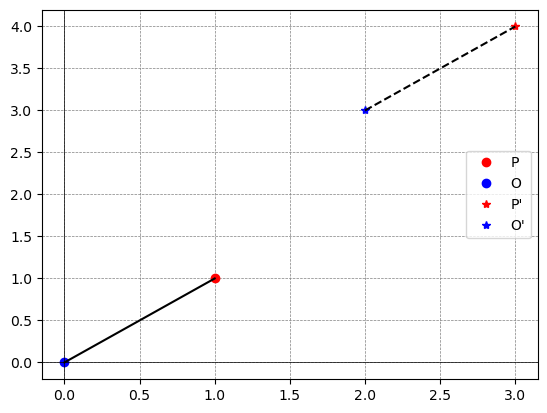

In [10]:
P = np.array([1,1])
O = np.array([0,0])

v = np.array([2,3])

d = np.sqrt((P[0]-O[0])**2 + (P[1]-O[1])**2)

P_prime = P + v
O_prime = O + v

d_prime = np.sqrt((P_prime[0]-O_prime[0])**2 + (P_prime[1]-O_prime[1])**2)

# Ubicar los puntos
plt.plot(P[0], P[1], 'ro', label='P')
plt.plot(O[0], O[1], 'bo', label='O')
plt.plot(P_prime[0], P_prime[1], 'r*', label='P\'')
plt.plot(O_prime[0], O_prime[1], 'b*', label='O\'')

# Trazar la distancia
plt.plot([O[0], P[0]], [O[1], P[1]], 'k-')
plt.plot([O_prime[0], P_prime[0]], [O_prime[1], P_prime[1]], 'k--')

plt.axhline(0, color='black',linewidth=0.5) # Horizontal line
plt.axvline(0, color='black',linewidth=0.5) # Vertical line
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5) # Grid

plt.legend()
plt.show()


# Problema 4.24

Al transformar coordenadas $x'y'$ a $xy$ esto por lo general implica cambioS en la escala y rotación de los ejes coordenados.

Al tener la función $ f (x,y)$
$$
\begin{pmatrix}
x \\
y
\end{pmatrix}
\rightarrow
\begin{pmatrix}
x' \\
y'
\end{pmatrix}
$$

Supongamos que tenemos una ecuación en coordenadas $x'y'$ que en forma polar es $ r = f(\theta) $, donde $ r $ es la distancia desde el origen al punto en las coordenadas $x'y'$, y $ \theta $ es el ángulo polar. La transformación a coordenadas $xy$ se realiza generalmente de la siguiente manera: $ x = r \cdot \cos(\theta) $ y $ y = r \cdot \sin(\theta) $.

Por lo tanto, si tu ecuación en coordenadas $x'y'$ es $ r = f(\theta) $, después de la transformación a coordenadas $xy$ se obtendría $ x = f(\theta) \cdot \cos(\theta) $ y $ y = f(\theta) \cdot \sin(\theta) $.


# Conclusión 


Estos ejercicios abordan transformaciones en álgebra lineal y geometría analítica, esenciales para entender cómo operaciones como rotación y traslación afectan objetos en un plano. El orden de las transformaciones es crucial, ya que la composición de matrices no es conmutativa. La invariancia del movimiento relativo muestra que si un observador y un objeto se mueven juntos, no se percibe movimiento relativo, reflejando el principio de relatividad. La transformación entre sistemas de coordenadas es descomponible en operaciones más simples, siendo las transformaciones polares a cartesianas particularmente relevantes para representar curvas. La habilidad para programar estas transformaciones es vital en ciencias y tecnología.